In [1]:

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import datetime as datetime
from numpy import log
from pandas import Series

In [2]:
dataset  = pd.read_csv('airline_passengers.csv')

In [3]:
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dataset['Month'] = pd.to_datetime(dataset['Month']) #tocovert date = YYYY-MM-DD
dataset

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [5]:
dataset.set_index('Month',inplace = True)

In [6]:
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


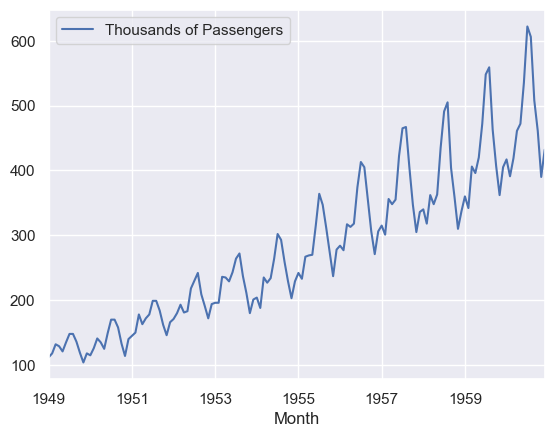

In [7]:
dataset.plot()
plt.show()

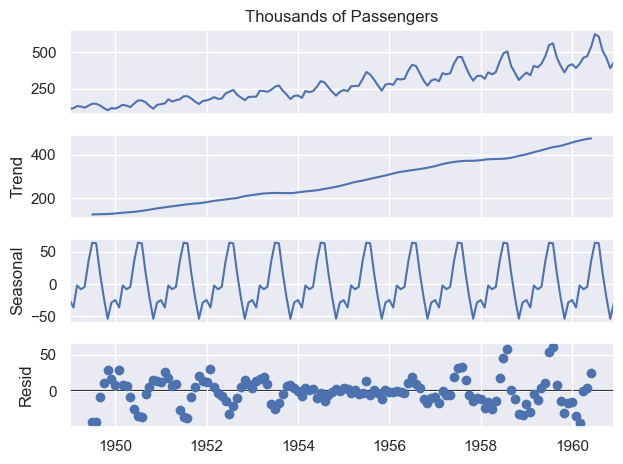

In [8]:
# Decomposition required
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'],model = 'additive',period = 12)
decomposition.plot()
plt.show()

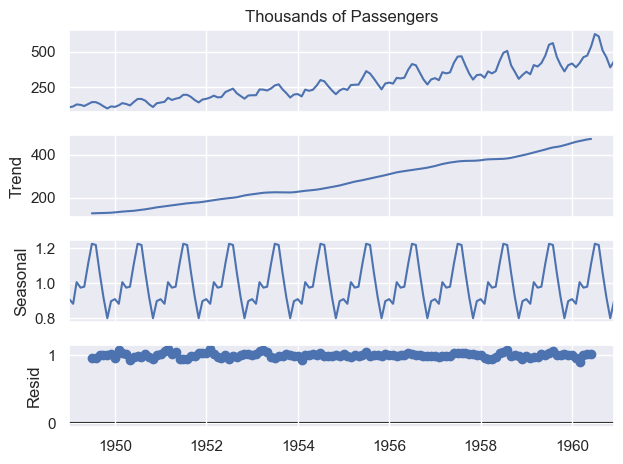

In [9]:
decomposition = seasonal_decompose(dataset['Thousands of Passengers'],model = 'miltiplicative',period = 12)
decomposition.plot()
plt.show()

In [10]:
import statsmodels.api as sm
sm.stats.durbin_watson(dataset['Thousands of Passengers']) # very less so no Liner regression

0.0121527966037621

In [11]:
# Time series shouldbe stationary only thn we can build a TSF
# Augmented Dickey Fuller Test - to check data set is stationary or not 

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060547,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [14]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test : To find the statonary or non stationary")
    labels = ['ADF Stats test','P-value','no of LAGs','No of Observation']

    for i,j in zip(result,labels):
        print(j + '=' + str(i))

    if result[1]<=0.05:
        print('Strong evidence against null hypothesis and my time series is Stationary')
    else:
        print('Weak evidence against null hypothesis and my series is Non- Stationary')

In [15]:
adf_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test : To find the statonary or non stationary
ADF Stats test=0.8153688792060547
P-value=0.9918802434376411
no of LAGs=13
No of Observation=130
Weak evidence against null hypothesis and my series is Non- Stationary


In [16]:
dataset['1st Diff']= dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(1)

In [17]:
dataset.head(5)

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [18]:
adf_check(dataset['1st Diff'].dropna())

Augmented Dickey Fuller Test : To find the statonary or non stationary
ADF Stats test=-2.829266824170004
P-value=0.05421329028382491
no of LAGs=12
No of Observation=130
Weak evidence against null hypothesis and my series is Non- Stationary


In [19]:
dataset['2nd Diff'] = dataset['1st Diff']-dataset['1st Diff'].shift(1)

In [20]:
dataset.head(10)

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [21]:
adf_check(dataset['2nd Diff'].dropna())

Augmented Dickey Fuller Test : To find the statonary or non stationary
ADF Stats test=-16.38423154246853
P-value=2.732891850014085e-29
no of LAGs=11
No of Observation=130
Strong evidence against null hypothesis and my time series is Stationary


In [22]:
# Trend : p d q 
# p : ?
# d : 2
# q : ?


In [23]:
dataset['Seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [24]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [25]:
adf_check(dataset['Seasonality'].dropna())

Augmented Dickey Fuller Test : To find the statonary or non stationary
ADF Stats test=-3.3830207264924814
P-value=0.011551493085514952
no of LAGs=1
No of Observation=130
Strong evidence against null hypothesis and my time series is Stationary


In [26]:
# Trend : p d q 
# p : ? partial correlation
# d : 2 (Augmented dickey fuller test)
# q : ? Auto Correlation

# Seasonality : P D Q
# P : ?
# D : 1
# Q : ?

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Trend

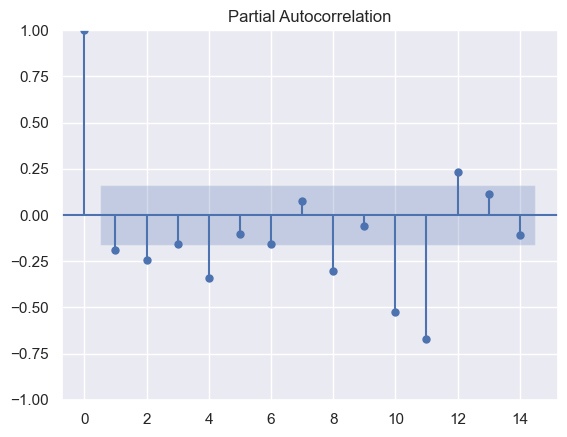

In [28]:
plot_pacf(dataset['2nd Diff'].dropna(),lags =14) #partial correlation
plt.show()

In [29]:
# Trend : p d q 
# p : ? partial correlation = 4
# d : 2 (Augmented dickey fuller test)
# q : ? Auto Correlation  = 2

# Seasonality : P D Q
# P : ?
# D : 1
# Q : ?

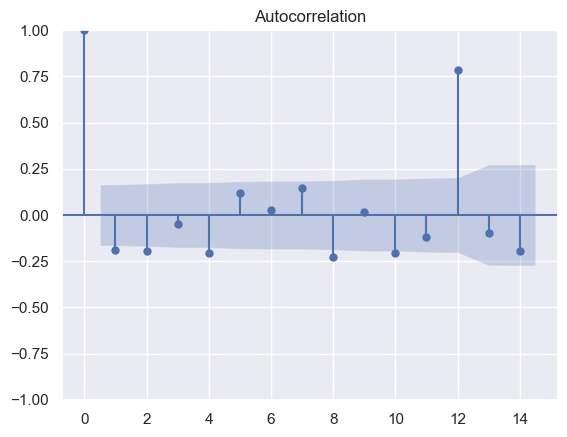

In [30]:
plot_acf(dataset['2nd Diff'].dropna(),lags =14) # auto correlation
plt.show()

 Senstivity

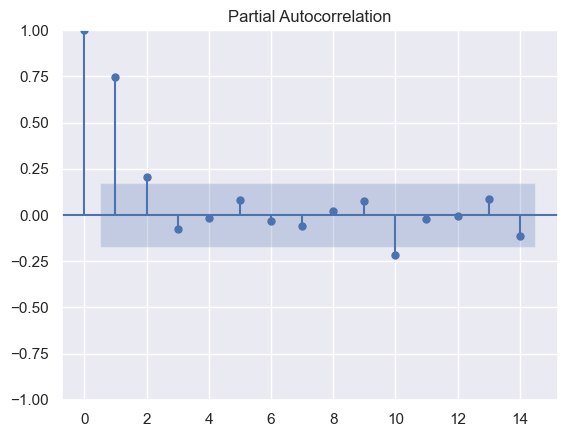

In [31]:
plot_pacf(dataset['Seasonality'].dropna(),lags =14) #partial correlation
plt.show()

In [32]:
# Trend : p d q 
# p : ? partial correlation = 4
# d : 2 (Augmented dickey fuller test)
# q : ? Auto Correlation  = 2

# Seasonality : P D Q
# P : ? = 2
# D : 1
# Q : ? = 5

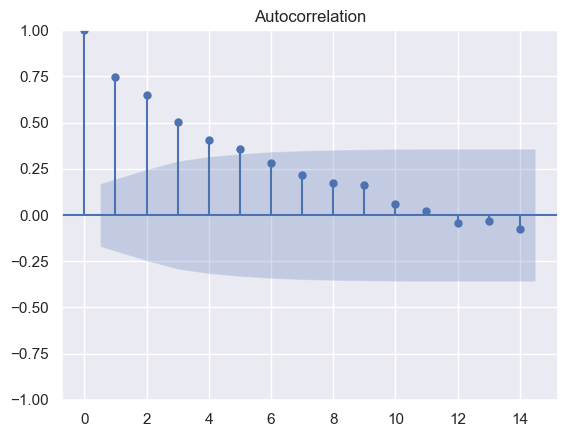

In [33]:
plot_acf(dataset['Seasonality'].dropna(),lags =14) # auto correlation
plt.show()

In [34]:
#ARIMA
#Building Arima Model for Time Series Forecasting


In [35]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [36]:
dataset.head()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [37]:
model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],order = (4,2,2),seasonal_order = (2,1,5,12))

C:\Users\kisho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kisho\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [38]:
result = model.fit()

C:\Users\kisho\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
print(result.summary())

                                            SARIMAX Results                                             
Dep. Variable:                          Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -496.729
Date:                                          Tue, 05 Nov 2024   AIC                           1021.459
Time:                                                  14:21:13   BIC                           1061.604
Sample:                                              01-01-1949   HQIC                          1037.771
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

In [40]:
# AIC = 1021.459 ,seasonal_order = (2,1,5,12)
# AIC = 1021.459 ,seasonal_order = (2,1,4,12)
# AIC = 1021.459 ,seasonal_order = (2,1,3,12)
# AIC = 1021.459 ,seasonal_order = (2,1,2,12)
# AIC = 1021.459 ,seasonal_order = (2,1,1,12)


In [41]:
dataset.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0
1960-11-01,390,-71.0,-24.0,28.0
1960-12-01,432,42.0,113.0,27.0


In [42]:
#predict 01-jan-1961 to 01-dec-1965

In [43]:
len(dataset)

144

In [44]:
#Validate the model by using training data set
dataset['Forecast'] = result.predict(start = 130 , end = 144 , dynamic = True)

In [45]:
dataset['Forecast']

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    611.152804
1960-09-01    506.261828
1960-10-01    449.570982
1960-11-01    395.065691
1960-12-01    429.190571
Name: Forecast, Length: 144, dtype: float64

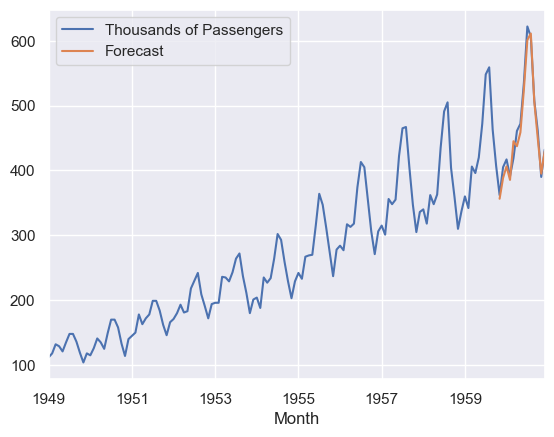

In [46]:
dataset[['Thousands of Passengers','Forecast']].plot()
plt.show()

In [47]:
#Auto Approach

import itertools

p = d = q = range(0,4)# give max range based on parameter analysis
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

print('few parameter combinations are :')
print('{} * {}'.format(pdq[1],seasonal_pdq[1]))
print('{} * {}'.format(pdq[2],seasonal_pdq[2]))
print('{} * {}'.format(pdq[0],seasonal_pdq[1]))

few parameter combinations are :
(0, 0, 1) * (0, 0, 1, 12)
(0, 0, 2) * (0, 0, 2, 12)
(0, 0, 0) * (0, 0, 1, 12)


In [ ]:
for param_trend in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'],
                                              order = param_trend,seasonal_order = param_seasonal,
                                             enforce_stationarity=False,enforce_invertibility=False)
            result = model.fit()
            print("ARIMA{}x{}-AIC : {}".format(param_trend,param_seasonal,result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)-AIC : 2044.4329486427587
ARIMA(0, 0, 0)x(0, 0, 1, 12)-AIC : 1886.6012941219583
ARIMA(0, 0, 0)x(0, 0, 2, 12)-AIC : 1498.2861800857982
ARIMA(0, 0, 0)x(0, 0, 3, 12)-AIC : 6884.203739588103
ARIMA(0, 0, 0)x(0, 1, 0, 12)-AIC : 1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12)-AIC : 1156.2914901508518
ARIMA(0, 0, 0)x(0, 1, 2, 12)-AIC : 1016.1362797336366
ARIMA(0, 0, 0)x(0, 1, 3, 12)-AIC : 4517.651354925047
ARIMA(0, 0, 0)x(0, 2, 0, 12)-AIC : 1103.8641596245525
ARIMA(0, 0, 0)x(0, 2, 1, 12)-AIC : 942.1856088448783
ARIMA(0, 0, 0)x(0, 2, 2, 12)-AIC : 834.3017303458538
ARIMA(0, 0, 0)x(0, 2, 3, 12)-AIC : 3588.168371570974
ARIMA(0, 0, 0)x(0, 3, 0, 12)-AIC : 1091.9854424075015
ARIMA(0, 0, 0)x(0, 3, 1, 12)-AIC : 909.9633990836545
ARIMA(0, 0, 0)x(0, 3, 2, 12)-AIC : 798.962247268547
ARIMA(0, 0, 0)x(0, 3, 3, 12)-AIC : 697.9234177866716
ARIMA(0, 0, 0)x(1, 0, 0, 12)-AIC : 1118.6259190717344
ARIMA(0, 0, 0)x(1, 0, 1, 12)-AIC : 1107.2562043237085
ARIMA(0, 0, 0)x(1, 0, 2, 12)-AIC : 10

In [49]:
#prediction with new timesteps
dataset.tail(1)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
Month,,,,,
1960-12-01,432,42.0,113.0,27.0,429.190571


In [51]:
from pandas.tseries.offsets import DateOffset
future_data = [dataset.index[-1]+ DateOffset(months = x) for x in range(0,61)]

In [52]:
future_data

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [53]:
future_data_df = pd.DataFrame(index = future_data[1:],columns = dataset.columns)

In [54]:
future_data_df.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [55]:
future_data_df.head()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN


In [56]:
future_pred = pd.concat([dataset,future_data_df])

In [57]:
future_pred

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN


In [58]:
print(len(dataset))

144


In [59]:
print(len(future_pred))

204


In [60]:
# predict the future data for 60 months

In [61]:
future_pred['Forecast'] = result.predict(start = 145 , end = 204, dynamic = True)

C:\Users\kisho\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


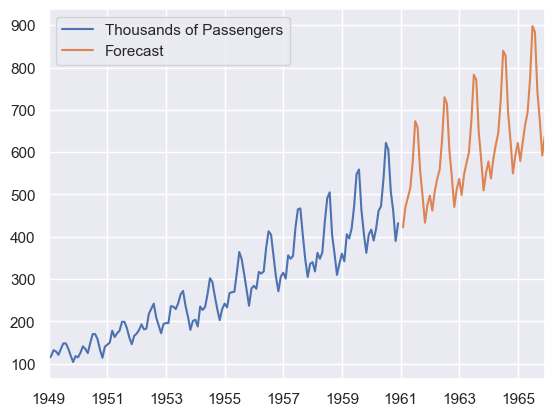

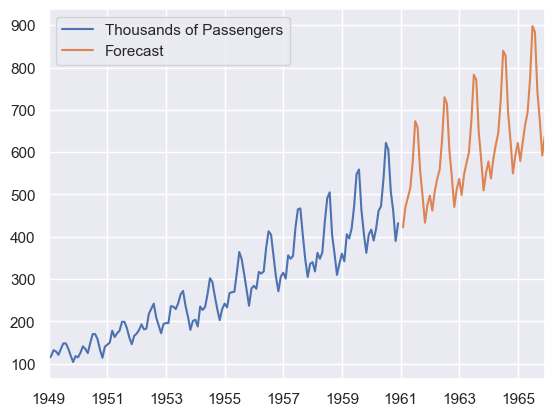

In [64]:
future_pred[['Thousands of Passengers','Forecast']].plot()
plt.show()

In [65]:
future_pred.tail(60)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,422.353502
1961-03-01,NaN,NaN,NaN,NaN,470.038089
1961-04-01,NaN,NaN,NaN,NaN,492.970365
1961-05-01,NaN,NaN,NaN,NaN,515.416801
1961-06-01,NaN,NaN,NaN,NaN,577.494660
1961-07-01,NaN,NaN,NaN,NaN,673.206027
1961-08-01,NaN,NaN,NaN,NaN,657.872322
1961-09-01,NaN,NaN,NaN,NaN,557.538659
1961-10-01,NaN,NaN,NaN,NaN,497.820186


In [66]:
future_pred.to_csv("Forecasting.csv")